<a href="https://colab.research.google.com/github/famibelle/Data-Science-Tech-Institute/blob/main/Continuous_Optimisation_Autumn_2019_Exercice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Continuous Optimisation Exam Autumn 2019**
#*Exercise* 1.

In [ ]:
from sympy import *
from sympy.calculus.util import is_convex
from sympy.abc import x, y, z

init_printing()

# Minimization under inequality constraints

We are dealing with the following problem on $\mathbb{R}^3$ :

\begin{align}
min f(x, y,z) = x^2+2y^2+3z^2-4x-4y
\end{align}

\begin{align}
 g(x,y,z) = x+y+z-3
\end{align}

In [ ]:
#f = x**2 + y**2 + x*y + x
#g = x + y - 1

f = x**2+2*y**2+3*z**2-4*x-4*y
g = x+y+z-3

X = f.free_symbols

In [ ]:
f

In [ ]:
g

In [ ]:
if len(X) == 2:
  plotting.plot3d(f, (x, -10, 10), (y, -10, 10),size=(10,7));

## 1. Is the set $K = {(x, y, z)/x + y + z ≤ 3}$ closed in $\mathbb{R}^3$ ? open ? convex ? (explain in two words for each question), how would you call this set ?

If we have a subset $K$ such that $K=\{\forall$ $X \in \mathbb{R}^n | g(X)\}\leq 0$ 

$K$ is **closed** for any continuous $g$

$K = {(x, y, z)/x + y + z ≤ 3}$

the boundary of $K$ is $x + y + z ≤ 3$

For any point of $K$ there should exist a ball $\mathcal B(X,ϵ)$ included in $K$

$\forall X\in K,\quad \exists \epsilon$ such that $\mathcal B(X,ϵ) \subset K$

**intuition**: the $\color{blue}{points}$ at the border does not satisfy the **opennes** condition

=>$K$ is not **open** (large inequality)

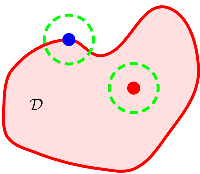

Convexity definition: 

$\forall X_1,X_2 \in K \quad \forall θ \in [0\,;1] \qquad θ\,X_1 + (1-\theta)\,X_2 \in K$


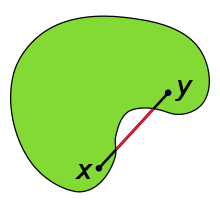

## 2. Is the function $f(x, y, z)$ convex ? strictly convex ? α-convex ? (if yes give the value of $\alpha$)

In [ ]:
for index in X:
  if is_convex(f,index):
    print("the function if convex for the variable", index)

the function if convex for the variable y
the function if convex for the variable x
the function if convex for the variable z


In [ ]:
GradOf_f = [f.diff(x) for x in X]
Grad_f = Matrix(GradOf_f)
Grad_f

⎡4⋅y - 4⎤
⎢       ⎥
⎢2⋅x - 4⎥
⎢       ⎥
⎣  6⋅z  ⎦

In [ ]:
GradOf_g = [g.diff(x) for x in X]
Grad_g = Matrix(GradOf_g)
Grad_g

⎡1⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎣1⎦

In [ ]:
H = hessian(f, list(X))
H

⎡4  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  6⎦

In [ ]:
eigenvalues = H.eigenvals()
eigenvalues

In [ ]:
alpha = min(eigenvalues)
alpha

In [ ]:
if alpha > 0:
  print("the function is α-convex with α =", alpha)
  print(alpha,"-convexity implies strict convexity")
else:
  print("the function is not α-convex with α =", alpha) 


the function is α-convex with α = 2
2 -convexity implies strict convexity


#3. Justify the existence and uniqueness of the solution of $(P)$.

**Existence of a minimum**
1. ✔️$K$ is non empty $\quad \Rightarrow$ trivial $(0,0,0)$ belongs to $K$
1. ✔️$K$ closed $\quad \Rightarrow$ already proven ($K$ is **closed** for any continuous $g$)
1. ✔️$f$ is continous
1. ❌$K$ is bounded
> if $K$ not bounded, is $f$ $∞$ at infinity? (i.e when $\|X\| → \infty$ does $\|f(X)\| → \infty$ ?)
>>easy to demonstrate that at some point $\|f(X)\|^2>\|X\|^2$

**Uniqueness of a minimum**
1. ✔️$f$ is strictly convex
1. ✔️$K$ is convex

## 4. Apply the Kuhn-Tucker theorem : are the hypotheses verified ? write the KuhnTucker relations.


**hypotheses**
1. ✔️$f$ and $g$ convex $\Rightarrow$ $f$ is 2-convex and $g$ is linear
1. ✔️differentiable on $K$ $\Rightarrow$ polynoms are differentiable

$f' + λ.g' = 0$

$λ.g = 0$

$λ\geq0$

$g \leq 0$ 


In [ ]:
lam = symbols('λ', real = True)
L = f + lam* g
L

In [ ]:
XLamb = L.free_symbols
XLamb

In [ ]:
gradL = [diff(L,x) for x in XLamb] # gradient of Lagrangian w.r.t. (x,y,z, etc.)
Matrix(gradL)

⎡x + y + z - 3⎤
⎢             ⎥
⎢ 2⋅x + λ - 4 ⎥
⎢             ⎥
⎢ 4⋅y + λ - 4 ⎥
⎢             ⎥
⎣   6⋅z + λ   ⎦

In [ ]:
stationary_points=solve(gradL)
stationary_points

In [ ]:
Min_f = f.subs(stationary_points)
print("the minimal value of the function f on K is ", Min_f)

the minimal value of the function f on K is  -6


We have proved before that there exists only a minimum, 

*Alternate solution with the matrix*


In [ ]:
C = Matrix([[0,4,0,1], [0,0,6,1],[1,1,1,0],[2,0,0,1]])
D = Matrix([4,0,3,4])
C, D

⎛⎡0  4  0  1⎤  ⎡4⎤⎞
⎜⎢          ⎥  ⎢ ⎥⎟
⎜⎢0  0  6  1⎥  ⎢0⎥⎟
⎜⎢          ⎥, ⎢ ⎥⎟
⎜⎢1  1  1  0⎥  ⎢3⎥⎟
⎜⎢          ⎥  ⎢ ⎥⎟
⎝⎣2  0  0  1⎦  ⎣4⎦⎠

In [ ]:
C.inv()*D

⎡2⎤
⎢ ⎥
⎢1⎥
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦